# CADI AI KaraAgro YOLOv8 Model Training

![KaraAgro Logo](https://th.bing.com/th/id/OIP.n8zs5yCgFmcpITkwPaMfMQHaGA?rs=1&pid=ImgDetMain)

## Overview
The process of training a YOLOv8 model to detect abiotic factors, insects, and diseases in agricultural images.

In [ ]:
# Install dependencies
%pip install --quiet datasets ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.3 MB/s eta 0:00:00


In [ ]:
# Import libraries
import ultralytics
from ultralytics import YOLO
from IPython.display import Image, clear_output
from google.colab.patches import cv2_imshow
import os
import shutil
import zipfile

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Download the dataset from Hugging Face (replace with your actual dataset path)
!git clone https://huggingface.co/datasets/KaraAgroAI/CADI-AI

# Define dataset paths
dataset_path = 'CADI-AI/Data'

# # Unzip the dataset files
for file_name in ['test.zip', 'val.zip', 'train.zip']:
    with zipfile.ZipFile(os.path.join(dataset_path, file_name), 'r') as zip_ref:
        zip_ref.extractall(dataset_path)

train_path = os.path.join(dataset_path, 'train')
val_path = os.path.join(dataset_path, 'val')
test_path = os.path.join(dataset_path, 'test')


Cloning into 'CADI-AI'...
remote: Enumerating objects: 54, done.
remote: Total 54 (delta 0), reused 0 (delta 0), pack-reused 54 (from 1)
Unpacking objects: 100% (54/54), 7.23 KiB | 672.00 KiB/s, done.
Filtering content: 100% (3/3), 3.52 GiB | 43.24 MiB/s, done.


In [ ]:

# Create a YOLOv8 data.yaml file
data_yaml = f"""
train: {train_path}
val: {val_path}
test: {test_path}

nc: 3  # number of classes
names: ['abiotic', 'insect', 'disease']
"""

with open('data.yaml', 'w') as f:
    f.write(data_yaml)

print("Dataset downloaded, unzipped, and prepared.")

Dataset downloaded, unzipped, and prepared.


In [ ]:
# Load a pretrained YOLOv8 model (choose from available models like yolov8n, yolov8s, etc.)
model = YOLO('yolov8n.pt')

# Train the model (adjust epochs, batch size, img size as needed) use cache="disk" for faster training
results = model.train(data='/content/data.yaml', epochs=10, imgsz=640, batch=64, project='training', cache="disk")

print("Training complete. Check the /training directory for results.")

Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=disk, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretra

In [ ]:
#Load model any checkpoint
model = YOLO('/content/training/train/weights/best.pt')


In [ ]:
from google.colab import files
files.download('/content/training/train/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


image 1/1 /content/CADI-AI/Data/test/images/1004.jpg: 544x640 1 insect, 60.4ms
Speed: 9.1ms preprocess, 60.4ms inference, 7.2ms postprocess per image at shape (1, 3, 544, 640)


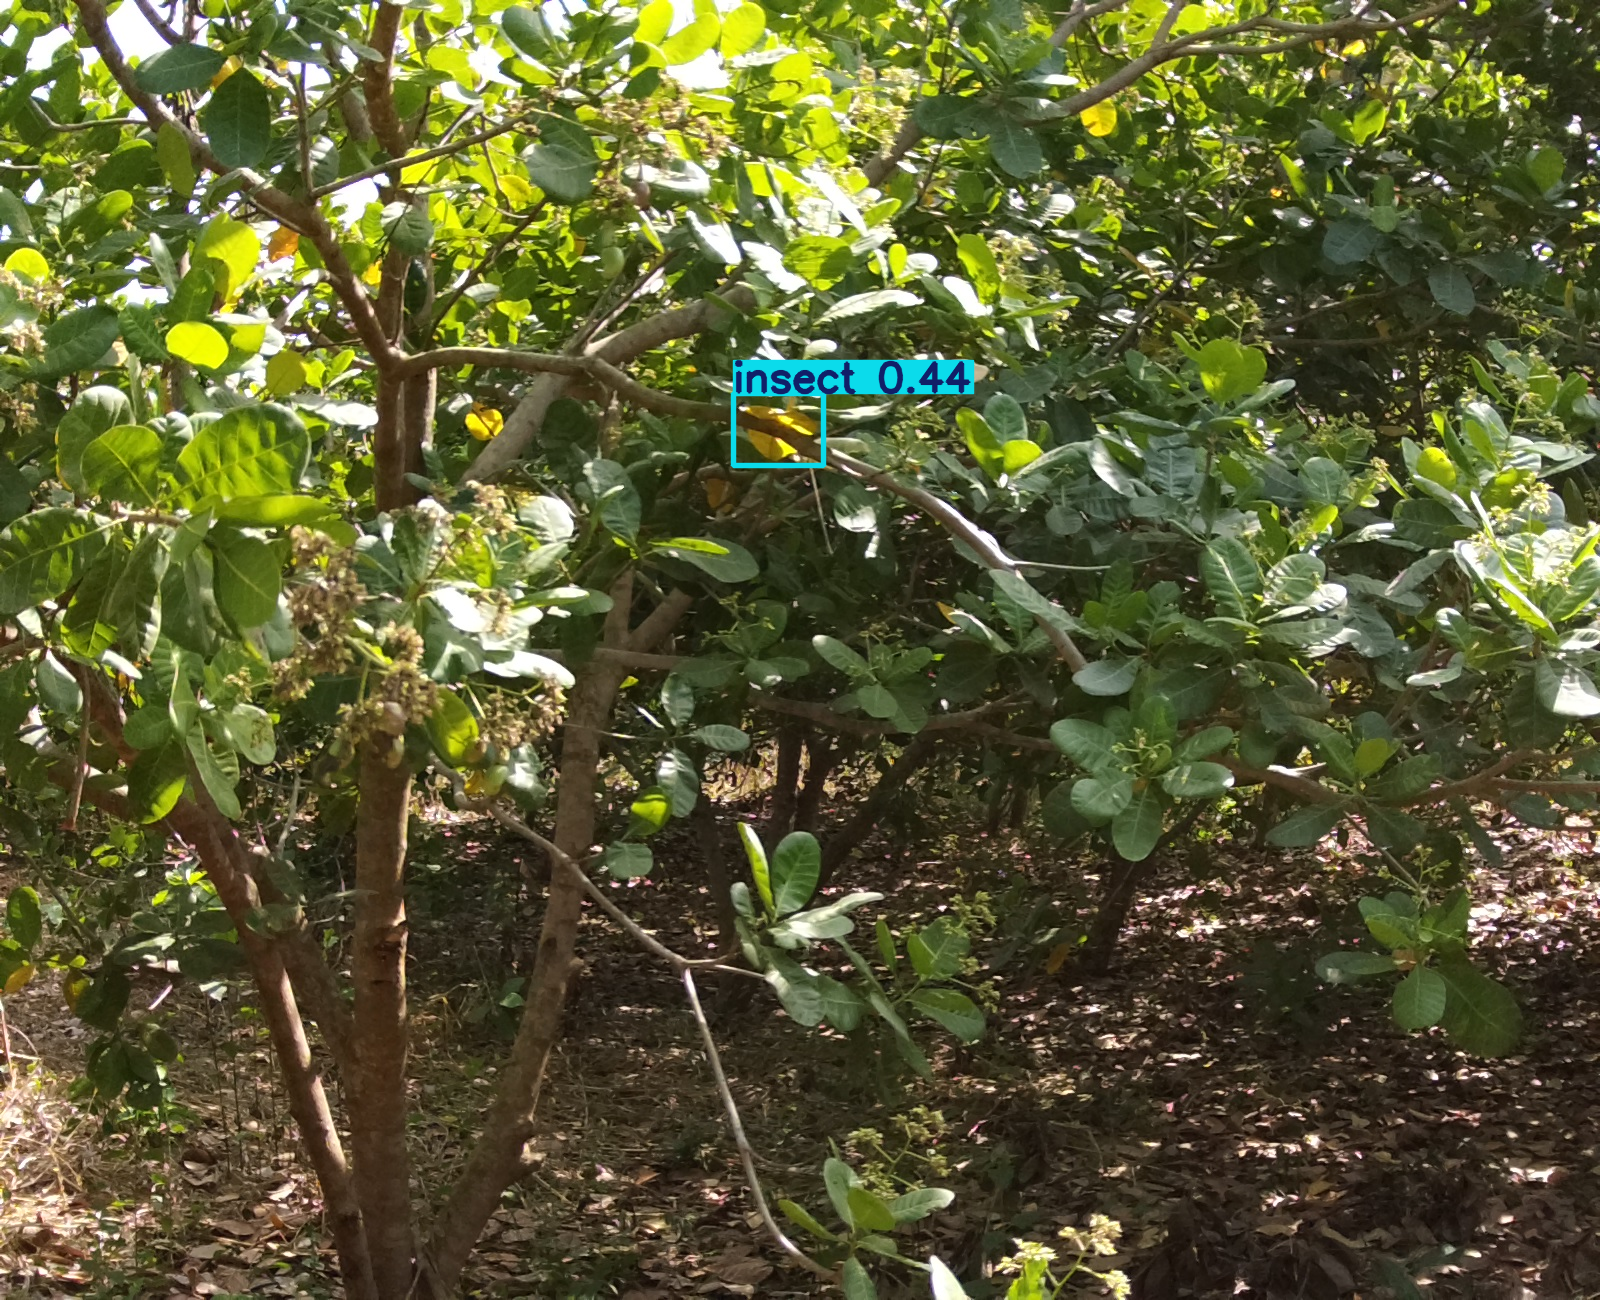

In [ ]:
# Path to test image
image_path = "/content/CADI-AI/Data/test/images/1004.jpg"

results = model(image_path)  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    # result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk
    cv2_imshow(result.plot())  # display image

